# Generative vs Discriminative Models: Penguin Species Classification

## Project Overview
This notebook compares the performance of **Naive Bayes (Generative Model)** and **Logistic Regression (Discriminative Model)** for classifying penguin species using the Palmer Penguins dataset.

### Models:
- **Naive Bayes**: A generative model that learns the probability distribution of features for each class
- **Logistic Regression**: A discriminative model that learns the decision boundary between classes

### Dataset:
We'll focus on two penguin species: **Adelie** and **Gentoo**

## 1. Import Required Libraries

In [24]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Machine Learning models and utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Display settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ All libraries imported successfully!")

✓ All libraries imported successfully!


## 2. Load and Explore the Dataset

In [25]:
# Load the dataset
df = pd.read_csv('penguins_size.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (344, 7)

First few rows:


,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [26]:
# Check data types and missing values
print("Dataset Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

print("\nSpecies Distribution:")
print(df['species'].value_counts())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB

Missing Values:
species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

Species Distribution:
species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64


## 3. Data Preprocessing

We'll perform the following preprocessing steps:
1. Filter for Adelie and Gentoo species only
2. Handle missing values
3. Select relevant features for classification
4. Encode categorical variables

In [27]:
# Filter for Adelie and Gentoo species only
df_filtered = df[df['species'].isin(['Adelie', 'Gentoo'])].copy()

print(f"Original dataset size: {len(df)}")
print(f"Filtered dataset size (Adelie & Gentoo): {len(df_filtered)}")
print("\nSpecies distribution after filtering:")
print(df_filtered['species'].value_counts())

Original dataset size: 344
Filtered dataset size (Adelie & Gentoo): 276

Species distribution after filtering:
species
Adelie    152
Gentoo    124
Name: count, dtype: int64


In [28]:
# Handle missing values - remove rows with any missing values
df_clean = df_filtered.dropna()

print(f"Dataset size after removing missing values: {len(df_clean)}")
print(f"Rows removed: {len(df_filtered) - len(df_clean)}")

print("\nFinal species distribution:")
print(df_clean['species'].value_counts())

Dataset size after removing missing values: 266
Rows removed: 10

Final species distribution:
species
Adelie    146
Gentoo    120
Name: count, dtype: int64


## 4. Feature Selection and Visualization

We'll use the following numerical features for classification:
- Culmen length (mm)
- Culmen depth (mm)
- Flipper length (mm)
- Body mass (g)

/var/folders/21/yqzrd7md02vc7kcr5z_h53_r0000gn/T/ipykernel_23890/3714894923.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='species', y=feature, ax=axes[idx], palette='Set2')
/var/folders/21/yqzrd7md02vc7kcr5z_h53_r0000gn/T/ipykernel_23890/3714894923.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x='species', y=feature, ax=axes[idx], palette='Set2')
/var/folders/21/yqzrd7md02vc7kcr5z_h53_r0000gn/T/ipykernel_23890/3714894923.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_clean, x

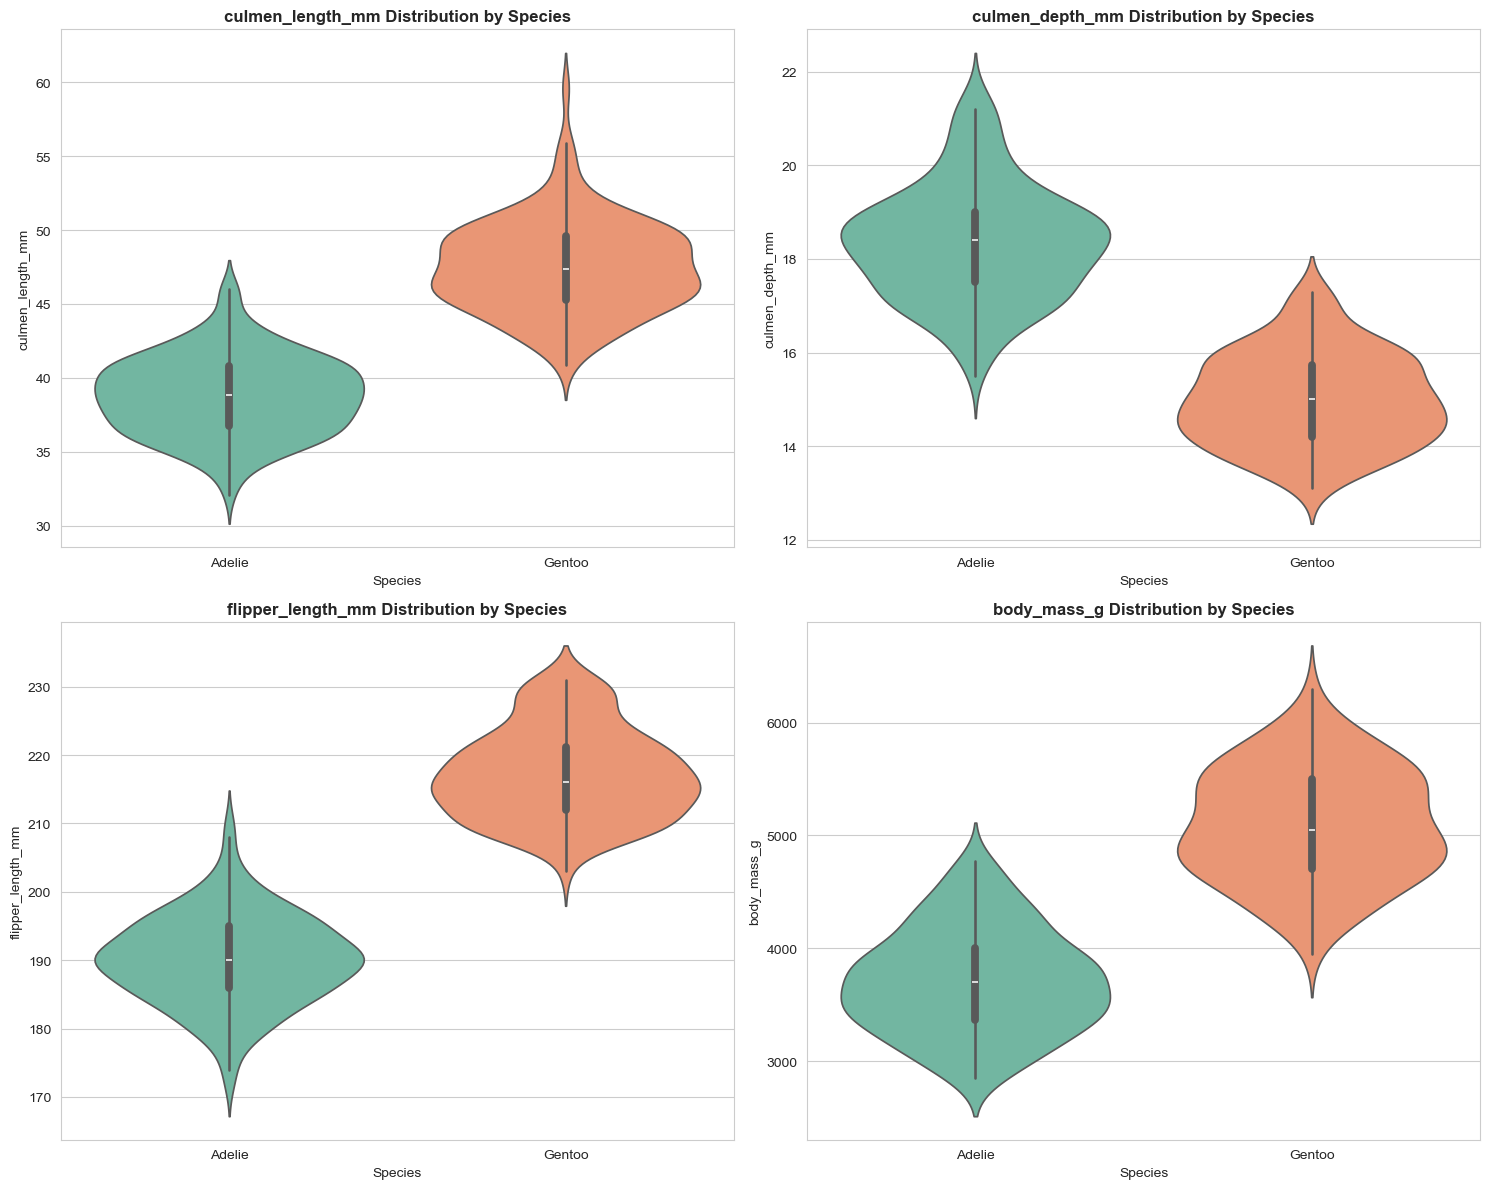

Feature distributions show clear separation between Adelie and Gentoo species!


In [29]:
# Visualize feature distributions by species
features = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for idx, feature in enumerate(features):
    sns.violinplot(data=df_clean, x='species', y=feature, ax=axes[idx], palette='Set2')
    axes[idx].set_title(f'{feature} Distribution by Species', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Species', fontsize=10)
    axes[idx].set_ylabel(feature, fontsize=10)

plt.tight_layout()
plt.show()

print("Feature distributions show clear separation between Adelie and Gentoo species!")

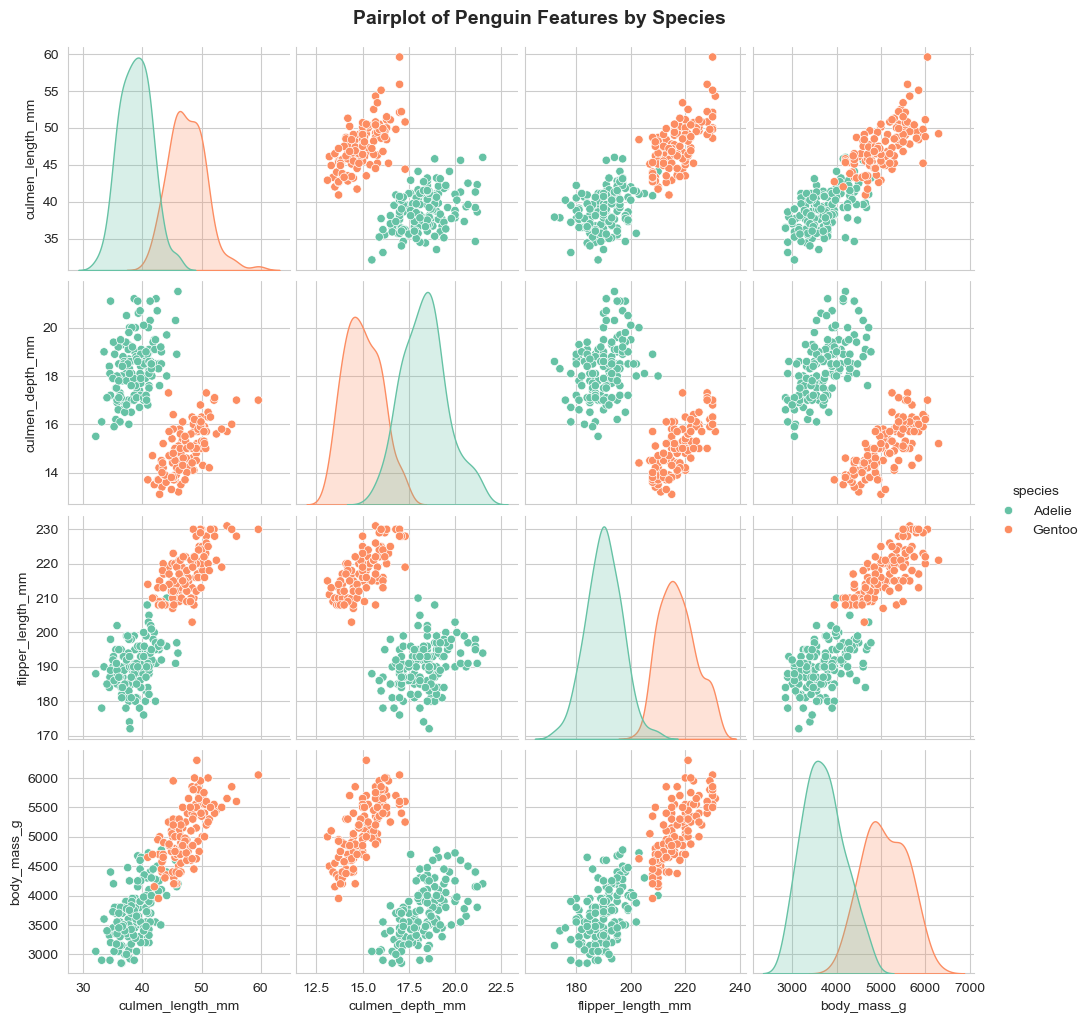

In [30]:
# Create a pairplot to visualize relationships between features
sns.pairplot(df_clean[features + ['species']], hue='species', palette='Set2', height=2.5)
plt.suptitle('Pairplot of Penguin Features by Species', y=1.02, fontsize=14, fontweight='bold')
plt.show()

In [31]:
# Summary statistics by species
print("Summary Statistics by Species:")
print("="*80)
print(df_clean.groupby('species')[features].mean())

Summary Statistics by Species:
         culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
species                                                                   
Adelie          38.823973         18.34726         190.102740  3706.164384
Gentoo          47.542500         15.00250         217.233333  5090.625000


## 5. Prepare Data for Modeling

Split the data into features (X) and target (y), then create training and test sets.

In [32]:
# Prepare features (X) and target (y)
X = df_clean[features]
y = df_clean['species']

# Encode target variable (Adelie=0, Gentoo=1)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

print("Feature matrix shape:", X.shape)
print("Target vector shape:", y_encoded.shape)
print("\nClass encoding:")
for i, species in enumerate(label_encoder.classes_):
    print(f"  {species}: {i}")

Feature matrix shape: (266, 4)
Target vector shape: (266,)

Class encoding:
  Adelie: 0
  Gentoo: 1


In [33]:
# Split data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])
print("\nClass distribution in training set:")
print(pd.Series(y_train).value_counts())
print("\nClass distribution in test set:")
print(pd.Series(y_test).value_counts())

Training set size: 212
Test set size: 54

Class distribution in training set:
0    116
1     96
Name: count, dtype: int64

Class distribution in test set:
0    30
1    24
Name: count, dtype: int64


In [34]:
# Standardize features for better model performance
# This is particularly important for Logistic Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✓ Features standardized (mean=0, std=1)")
print("\nFeature means after scaling (should be close to 0):")
print(np.round(X_train_scaled.mean(axis=0), 4))
print("\nFeature standard deviations after scaling (should be close to 1):")
print(np.round(X_train_scaled.std(axis=0), 4))

✓ Features standardized (mean=0, std=1)

Feature means after scaling (should be close to 0):
[-0.  0. -0.  0.]

Feature standard deviations after scaling (should be close to 1):
[1. 1. 1. 1.]


## 6. Model 1: Naive Bayes (Generative Model)

**Naive Bayes** is a generative model that uses Bayes' theorem with the "naive" assumption of independence between features. It models the probability distribution of each class and then uses these distributions to make predictions.

### How it works:
- Learns P(X|y) and P(y) for each class
- Uses Bayes' theorem to compute P(y|X)
- Assumes features are conditionally independent given the class

In [35]:
# Train Naive Bayes model
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

print("✓ Naive Bayes model trained successfully!")
print("\nModel parameters:")
print(f"  Classes: {label_encoder.classes_}")
print(f"  Class priors: {np.round(nb_model.class_prior_, 4)}")

✓ Naive Bayes model trained successfully!

Model parameters:
  Classes: ['Adelie' 'Gentoo']
  Class priors: [0.5472 0.4528]


In [36]:
# Make predictions on training and test sets
y_train_pred_nb = nb_model.predict(X_train_scaled)
y_test_pred_nb = nb_model.predict(X_test_scaled)

# Calculate accuracy scores
train_accuracy_nb = accuracy_score(y_train, y_train_pred_nb)
test_accuracy_nb = accuracy_score(y_test, y_test_pred_nb)

print("="*80)
print("NAIVE BAYES MODEL PERFORMANCE")
print("="*80)
print(f"Training Accuracy: {train_accuracy_nb:.4f} ({train_accuracy_nb*100:.2f}%)")
print(f"Test Accuracy:     {test_accuracy_nb:.4f} ({test_accuracy_nb*100:.2f}%)")
print("="*80)

NAIVE BAYES MODEL PERFORMANCE
Training Accuracy: 1.0000 (100.00%)
Test Accuracy:     1.0000 (100.00%)


In [37]:
# Detailed classification report for Naive Bayes
print("\nDetailed Classification Report (Naive Bayes - Test Set):")
print("="*80)
print(classification_report(y_test, y_test_pred_nb, target_names=label_encoder.classes_))


Detailed Classification Report (Naive Bayes - Test Set):
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



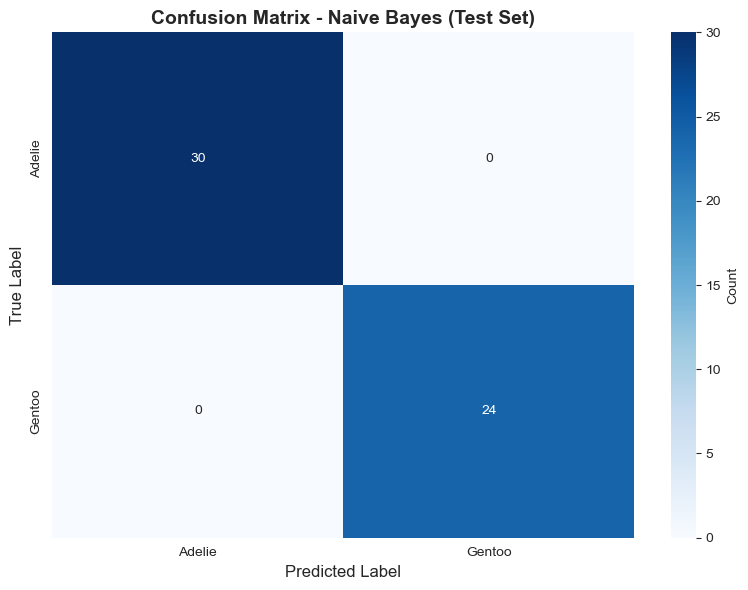

In [38]:
# Confusion Matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_test_pred_nb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Blues', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Naive Bayes (Test Set)', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

## 7. Model 2: Logistic Regression (Discriminative Model)

**Logistic Regression** is a discriminative model that directly learns the decision boundary between classes. It models P(y|X) directly without making assumptions about the distribution of features.

### How it works:
- Learns weights for each feature to maximize the probability of correct classification
- Uses the logistic (sigmoid) function to map linear combinations to probabilities
- Focuses on the boundary between classes rather than modeling the entire distribution

In [39]:
# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

print("✓ Logistic Regression model trained successfully!")
print("\nModel coefficients (feature importance):")
for feature, coef in zip(features, lr_model.coef_[0]):
    print(f"  {feature:20s}: {coef:8.4f}")
print(f"\nIntercept: {lr_model.intercept_[0]:.4f}")

✓ Logistic Regression model trained successfully!

Model coefficients (feature importance):
  culmen_length_mm    :   1.1594
  culmen_depth_mm     :  -2.1363
  flipper_length_mm   :   1.4142
  body_mass_g         :   1.3079

Intercept: -0.7280


In [40]:
# Make predictions on training and test sets
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculate accuracy scores
train_accuracy_lr = accuracy_score(y_train, y_train_pred_lr)
test_accuracy_lr = accuracy_score(y_test, y_test_pred_lr)

print("="*80)
print("LOGISTIC REGRESSION MODEL PERFORMANCE")
print("="*80)
print(f"Training Accuracy: {train_accuracy_lr:.4f} ({train_accuracy_lr*100:.2f}%)")
print(f"Test Accuracy:     {test_accuracy_lr:.4f} ({test_accuracy_lr*100:.2f}%)")
print("="*80)

LOGISTIC REGRESSION MODEL PERFORMANCE
Training Accuracy: 1.0000 (100.00%)
Test Accuracy:     1.0000 (100.00%)


In [41]:
# Detailed classification report for Logistic Regression
print("\nDetailed Classification Report (Logistic Regression - Test Set):")
print("="*80)
print(classification_report(y_test, y_test_pred_lr, target_names=label_encoder.classes_))


Detailed Classification Report (Logistic Regression - Test Set):
              precision    recall  f1-score   support

      Adelie       1.00      1.00      1.00        30
      Gentoo       1.00      1.00      1.00        24

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



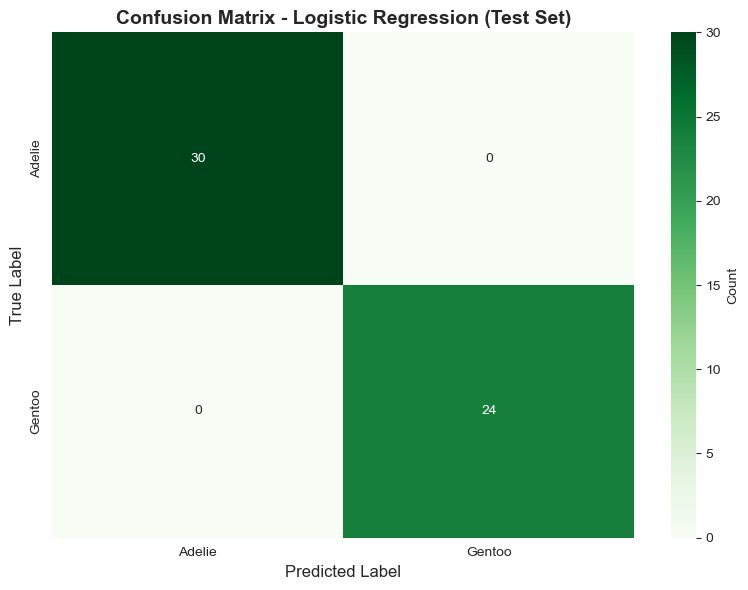

In [42]:
# Confusion Matrix for Logistic Regression
cm_lr = confusion_matrix(y_test, y_test_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Greens', 
            xticklabels=label_encoder.classes_, 
            yticklabels=label_encoder.classes_,
            cbar_kws={'label': 'Count'})
plt.title('Confusion Matrix - Logistic Regression (Test Set)', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

## 8. Model Comparison and Analysis

Now let's compare the performance of both models side by side.

In [43]:
# Create comparison dataframe
comparison_df = pd.DataFrame({
    'Model': ['Naive Bayes', 'Logistic Regression'],
    'Training Accuracy': [train_accuracy_nb, train_accuracy_lr],
    'Test Accuracy': [test_accuracy_nb, test_accuracy_lr],
    'Accuracy Difference': [
        abs(train_accuracy_nb - test_accuracy_nb),
        abs(train_accuracy_lr - test_accuracy_lr)
    ]
})

print("\n" + "="*80)
print("MODEL COMPARISON SUMMARY")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)


MODEL COMPARISON SUMMARY
              Model  Training Accuracy  Test Accuracy  Accuracy Difference
        Naive Bayes                1.0            1.0                  0.0
Logistic Regression                1.0            1.0                  0.0


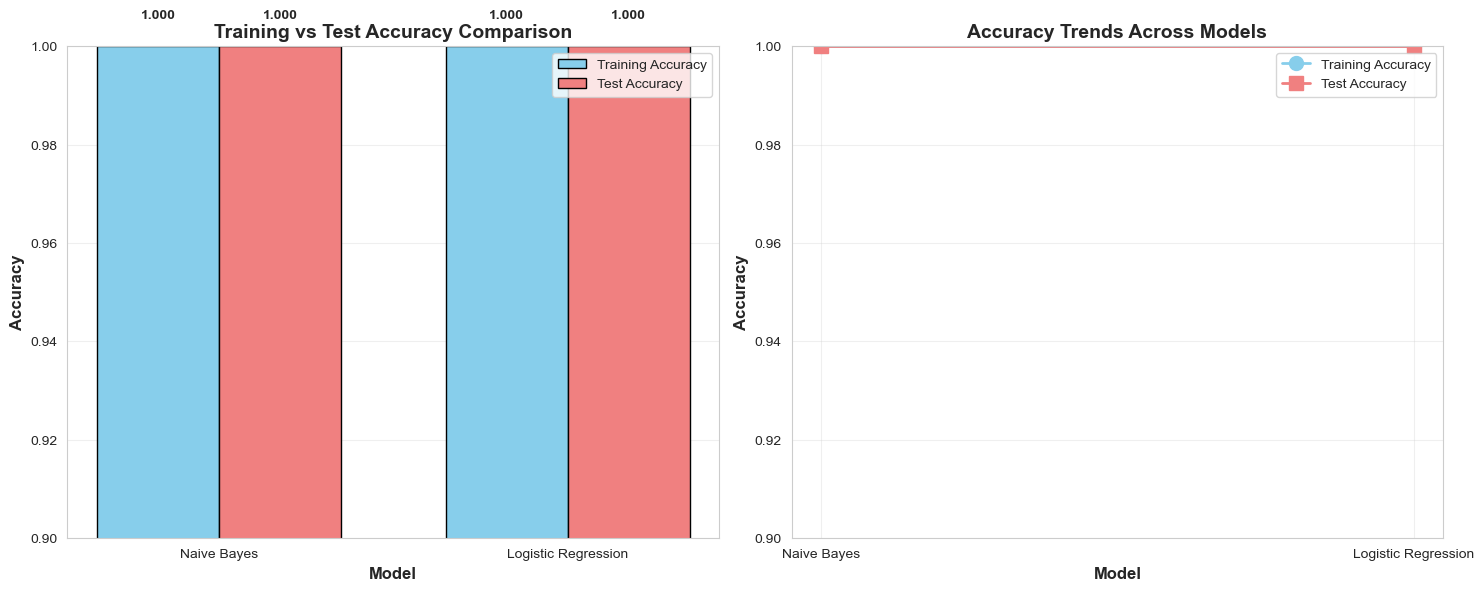

In [44]:
# Visualize accuracy comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Bar plot comparison
x = np.arange(len(comparison_df))
width = 0.35

ax1.bar(x - width/2, comparison_df['Training Accuracy'], width, 
        label='Training Accuracy', color='skyblue', edgecolor='black')
ax1.bar(x + width/2, comparison_df['Test Accuracy'], width, 
        label='Test Accuracy', color='lightcoral', edgecolor='black')

ax1.set_xlabel('Model', fontsize=12, fontweight='bold')
ax1.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax1.set_title('Training vs Test Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(comparison_df['Model'])
ax1.legend()
ax1.set_ylim([0.9, 1.0])
ax1.grid(axis='y', alpha=0.3)

# Add value labels on bars
for i, v in enumerate(comparison_df['Training Accuracy']):
    ax1.text(i - width/2, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')
for i, v in enumerate(comparison_df['Test Accuracy']):
    ax1.text(i + width/2, v + 0.005, f'{v:.3f}', ha='center', va='bottom', fontweight='bold')

# Line plot showing progression
models = comparison_df['Model']
ax2.plot(models, comparison_df['Training Accuracy'], marker='o', 
         linewidth=2, markersize=10, label='Training Accuracy', color='skyblue')
ax2.plot(models, comparison_df['Test Accuracy'], marker='s', 
         linewidth=2, markersize=10, label='Test Accuracy', color='lightcoral')

ax2.set_xlabel('Model', fontsize=12, fontweight='bold')
ax2.set_ylabel('Accuracy', fontsize=12, fontweight='bold')
ax2.set_title('Accuracy Trends Across Models', fontsize=14, fontweight='bold')
ax2.legend()
ax2.set_ylim([0.9, 1.0])
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. AUC (Area Under the ROC Curve) Analysis

The **AUC-ROC** metric measures the model's ability to distinguish between classes across all classification thresholds. An AUC of 1.0 indicates perfect classification, while 0.5 indicates random guessing.

### Why AUC is Important:
- Provides a single metric for model discrimination ability
- Threshold-independent evaluation
- Particularly useful for imbalanced datasets
- Complements accuracy by showing the trade-off between true positive and false positive rates

In [45]:
# Import additional metrics for AUC analysis
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Get predicted probabilities for both models
# For Naive Bayes
y_train_proba_nb = nb_model.predict_proba(X_train_scaled)[:, 1]
y_test_proba_nb = nb_model.predict_proba(X_test_scaled)[:, 1]

# For Logistic Regression
y_train_proba_lr = lr_model.predict_proba(X_train_scaled)[:, 1]
y_test_proba_lr = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate AUC scores
auc_train_nb = roc_auc_score(y_train, y_train_proba_nb)
auc_test_nb = roc_auc_score(y_test, y_test_proba_nb)

auc_train_lr = roc_auc_score(y_train, y_train_proba_lr)
auc_test_lr = roc_auc_score(y_test, y_test_proba_lr)

print("="*80)
print("AUC (Area Under the ROC Curve) SCORES")
print("="*80)
print(f"\nNaive Bayes:")
print(f"  Training AUC: {auc_train_nb:.4f} ({auc_train_nb*100:.2f}%)")
print(f"  Test AUC:     {auc_test_nb:.4f} ({auc_test_nb*100:.2f}%)")

print(f"\nLogistic Regression:")
print(f"  Training AUC: {auc_train_lr:.4f} ({auc_train_lr*100:.2f}%)")
print(f"  Test AUC:     {auc_test_lr:.4f} ({auc_test_lr*100:.2f}%)")
print("="*80)

AUC (Area Under the ROC Curve) SCORES

Naive Bayes:
  Training AUC: 1.0000 (100.00%)
  Test AUC:     1.0000 (100.00%)

Logistic Regression:
  Training AUC: 1.0000 (100.00%)
  Test AUC:     1.0000 (100.00%)


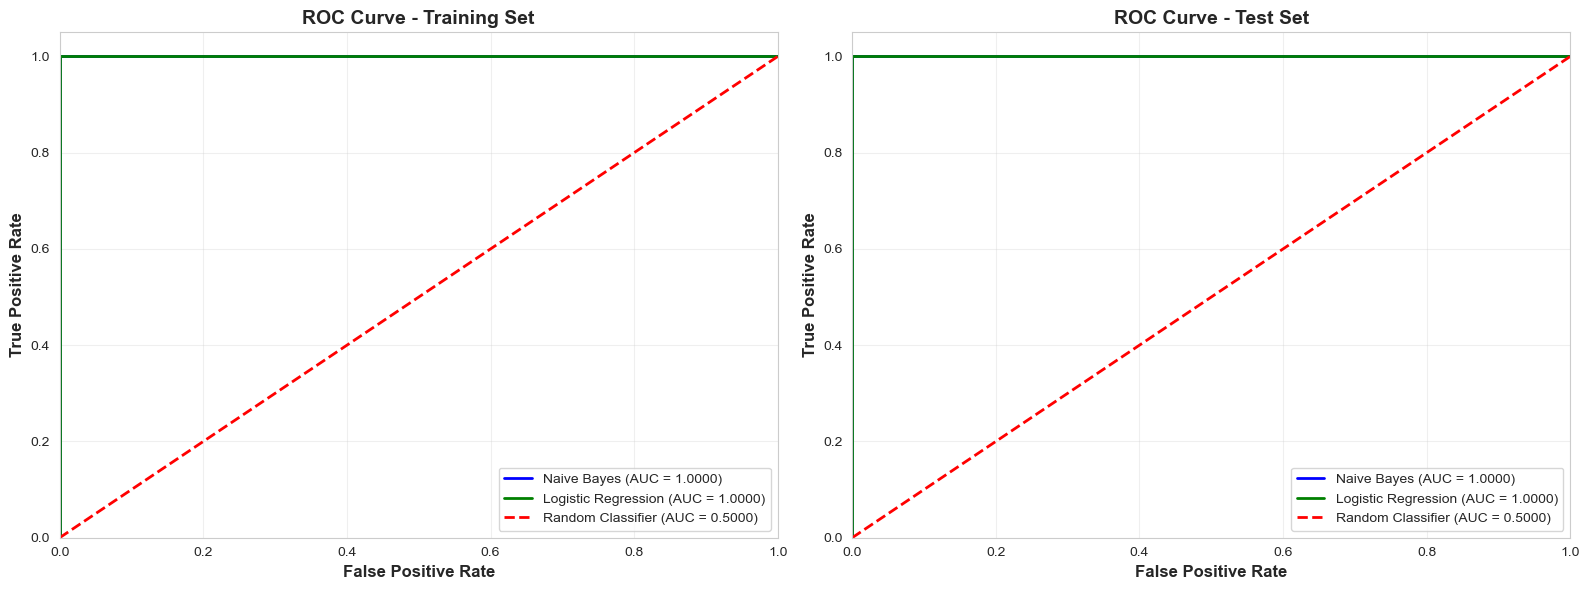

✓ ROC curves plotted successfully!


In [46]:
# Calculate ROC curves for both models
# Naive Bayes
fpr_train_nb, tpr_train_nb, _ = roc_curve(y_train, y_train_proba_nb)
fpr_test_nb, tpr_test_nb, _ = roc_curve(y_test, y_test_proba_nb)

# Logistic Regression
fpr_train_lr, tpr_train_lr, _ = roc_curve(y_train, y_train_proba_lr)
fpr_test_lr, tpr_test_lr, _ = roc_curve(y_test, y_test_proba_lr)

# Plot ROC curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Training Set ROC Curves
ax1.plot(fpr_train_nb, tpr_train_nb, color='blue', lw=2, 
         label=f'Naive Bayes (AUC = {auc_train_nb:.4f})')
ax1.plot(fpr_train_lr, tpr_train_lr, color='green', lw=2, 
         label=f'Logistic Regression (AUC = {auc_train_lr:.4f})')
ax1.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5000)')
ax1.set_xlim([0.0, 1.0])
ax1.set_ylim([0.0, 1.05])
ax1.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax1.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax1.set_title('ROC Curve - Training Set', fontsize=14, fontweight='bold')
ax1.legend(loc="lower right", fontsize=10)
ax1.grid(alpha=0.3)

# Test Set ROC Curves
ax2.plot(fpr_test_nb, tpr_test_nb, color='blue', lw=2, 
         label=f'Naive Bayes (AUC = {auc_test_nb:.4f})')
ax2.plot(fpr_test_lr, tpr_test_lr, color='green', lw=2, 
         label=f'Logistic Regression (AUC = {auc_test_lr:.4f})')
ax2.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5000)')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12, fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontsize=12, fontweight='bold')
ax2.set_title('ROC Curve - Test Set', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right", fontsize=10)
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ ROC curves plotted successfully!")

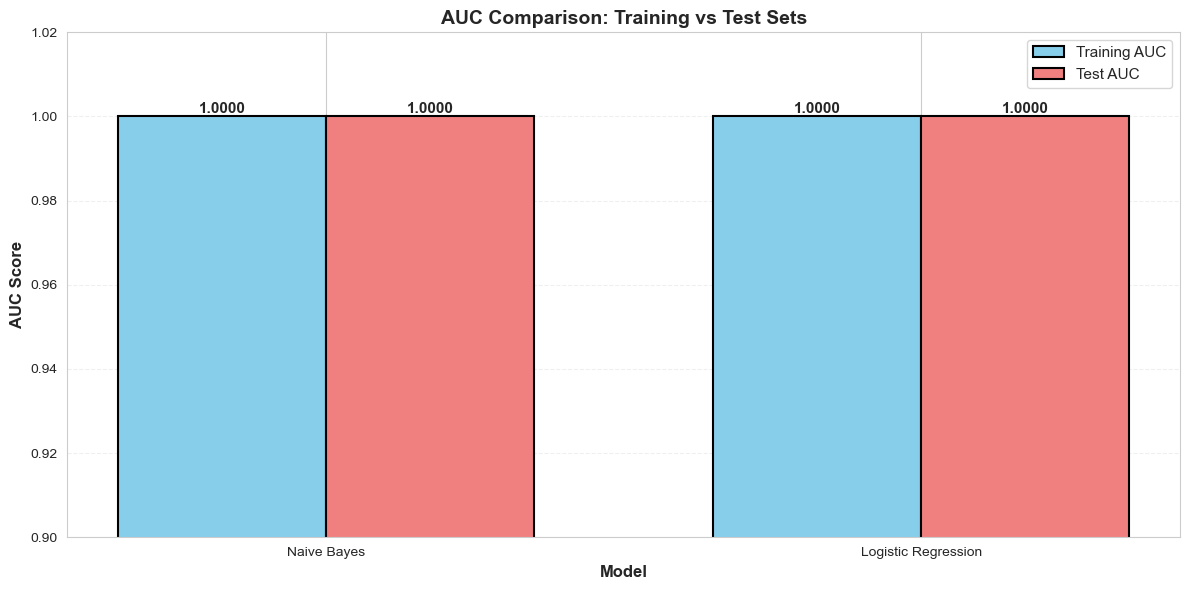

In [47]:
# AUC Comparison Visualization
fig, ax = plt.subplots(figsize=(12, 6))

models_list = ['Naive Bayes', 'Logistic Regression']
train_aucs = [auc_train_nb, auc_train_lr]
test_aucs = [auc_test_nb, auc_test_lr]

x_pos = np.arange(len(models_list))
width = 0.35

bars1 = ax.bar(x_pos - width/2, train_aucs, width, label='Training AUC', 
               color='skyblue', edgecolor='black', linewidth=1.5)
bars2 = ax.bar(x_pos + width/2, test_aucs, width, label='Test AUC', 
               color='lightcoral', edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

for bar in bars2:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{height:.4f}', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax.set_xlabel('Model', fontsize=12, fontweight='bold')
ax.set_ylabel('AUC Score', fontsize=12, fontweight='bold')
ax.set_title('AUC Comparison: Training vs Test Sets', fontsize=14, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(models_list)
ax.set_ylim([0.9, 1.02])
ax.legend(fontsize=11)
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

### AUC Interpretation

**AUC Score Ranges:**
- 0.90 - 1.00: Excellent discrimination
- 0.80 - 0.90: Good discrimination
- 0.70 - 0.80: Fair discrimination
- 0.60 - 0.70: Poor discrimination
- 0.50 - 0.60: Failed discrimination

In [48]:
# Detailed AUC interpretation
print("\n" + "="*80)
print("AUC INTERPRETATION AND INSIGHTS")
print("="*80)

# Determine better model based on test AUC
if auc_test_nb > auc_test_lr:
    better_auc_model = "Naive Bayes"
    auc_advantage = (auc_test_nb - auc_test_lr) * 100
elif auc_test_lr > auc_test_nb:
    better_auc_model = "Logistic Regression"
    auc_advantage = (auc_test_lr - auc_test_nb) * 100
else:
    better_auc_model = "Both models (tied)"
    auc_advantage = 0

print(f"\n1. BEST MODEL BY AUC: {better_auc_model}")
if auc_advantage != 0:
    print(f"   - AUC advantage on test set: {auc_advantage:.2f} percentage points")

print(f"\n2. DISCRIMINATION QUALITY:")
def get_discrimination_level(auc_score):
    if auc_score >= 0.90:
        return "Excellent"
    elif auc_score >= 0.80:
        return "Good"
    elif auc_score >= 0.70:
        return "Fair"
    elif auc_score >= 0.60:
        return "Poor"
    else:
        return "Failed"

print(f"   Naive Bayes (Test): {auc_test_nb:.4f} - {get_discrimination_level(auc_test_nb)} discrimination")
print(f"   Logistic Regression (Test): {auc_test_lr:.4f} - {get_discrimination_level(auc_test_lr)} discrimination")

print(f"\n3. WHAT AUC TELLS US:")
print(f"   ✓ Both models show {get_discrimination_level(min(auc_test_nb, auc_test_lr)).lower()} to")
print(f"     {get_discrimination_level(max(auc_test_nb, auc_test_lr)).lower()} ability to discriminate between species")
print(f"   ✓ High AUC values indicate the models can effectively separate Adelie from Gentoo")
print(f"   ✓ The ROC curve shows the trade-off between sensitivity and specificity")
print(f"   ✓ AUC is particularly useful as it's threshold-independent")

print("\n" + "="*80)


AUC INTERPRETATION AND INSIGHTS

1. BEST MODEL BY AUC: Both models (tied)

2. DISCRIMINATION QUALITY:
   Naive Bayes (Test): 1.0000 - Excellent discrimination
   Logistic Regression (Test): 1.0000 - Excellent discrimination

3. WHAT AUC TELLS US:
   ✓ Both models show excellent to
     excellent ability to discriminate between species
   ✓ High AUC values indicate the models can effectively separate Adelie from Gentoo
   ✓ The ROC curve shows the trade-off between sensitivity and specificity
   ✓ AUC is particularly useful as it's threshold-independent



## 10. Lift and Gain Charts Analysis

**Lift and Gain charts** are powerful tools for evaluating model performance, particularly useful in understanding how well the model ranks predictions. These charts help answer: "If we select the top X% of predictions, how many actual positives do we capture?"

### Key Concepts:
- **Gain**: Cumulative percentage of positive cases captured at each decile
- **Lift**: How much better the model performs compared to random selection
- **Deciles**: Data divided into 10 equal groups based on predicted probabilities

### Why They Matter:
- Show model effectiveness in prioritizing predictions
- Useful for resource allocation and targeted interventions
- Complement accuracy and AUC by showing practical utility

In [49]:
# Function to calculate Lift and Gain
def calculate_lift_gain(y_true, y_proba, n_deciles=10):
    """
    Calculate Lift and Gain metrics for model evaluation
    
    Parameters:
    - y_true: actual labels
    - y_proba: predicted probabilities
    - n_deciles: number of deciles (default=10)
    
    Returns:
    - DataFrame with decile, gain, and lift metrics
    """
    # Create dataframe with actual and predicted
    df = pd.DataFrame({
        'actual': y_true,
        'predicted_proba': y_proba
    })
    
    # Sort by predicted probability in descending order
    df = df.sort_values('predicted_proba', ascending=False).reset_index(drop=True)
    
    # Calculate deciles
    df['decile'] = pd.qcut(df.index, n_deciles, labels=False, duplicates='drop') + 1
    
    # Group by decile
    decile_stats = df.groupby('decile').agg({
        'actual': ['sum', 'count']
    }).reset_index()
    
    decile_stats.columns = ['decile', 'positives', 'total']
    
    # Calculate cumulative values
    decile_stats['cumulative_positives'] = decile_stats['positives'].cumsum()
    decile_stats['cumulative_total'] = decile_stats['total'].cumsum()
    
    # Total positives in dataset
    total_positives = df['actual'].sum()
    total_records = len(df)
    
    # Calculate Gain (% of total positives captured)
    decile_stats['gain'] = (decile_stats['cumulative_positives'] / total_positives) * 100
    
    # Calculate Lift
    # Lift = (% of positives in decile) / (% of positives in entire dataset)
    decile_stats['lift'] = (
        (decile_stats['cumulative_positives'] / decile_stats['cumulative_total']) /
        (total_positives / total_records)
    )
    
    # Add baseline (random model)
    decile_stats['baseline_gain'] = (decile_stats['cumulative_total'] / total_records) * 100
    
    return decile_stats

print("✓ Lift and Gain calculation function defined successfully!")

✓ Lift and Gain calculation function defined successfully!


In [50]:
# Calculate Lift and Gain for both models on test set
lift_gain_nb = calculate_lift_gain(y_test, y_test_proba_nb)
lift_gain_lr = calculate_lift_gain(y_test, y_test_proba_lr)

print("="*80)
print("LIFT AND GAIN ANALYSIS - NAIVE BAYES (Test Set)")
print("="*80)
print(lift_gain_nb.to_string(index=False))

print("\n" + "="*80)
print("LIFT AND GAIN ANALYSIS - LOGISTIC REGRESSION (Test Set)")
print("="*80)
print(lift_gain_lr.to_string(index=False))

LIFT AND GAIN ANALYSIS - NAIVE BAYES (Test Set)
 decile  positives  total  cumulative_positives  cumulative_total       gain     lift  baseline_gain
      1          6      6                     6                 6  25.000000 2.250000      11.111111
      2          5      5                    11                11  45.833333 2.250000      20.370370
      3          5      5                    16                16  66.666667 2.250000      29.629630
      4          6      6                    22                22  91.666667 2.250000      40.740741
      5          2      5                    24                27 100.000000 2.000000      50.000000
      6          0      5                    24                32 100.000000 1.687500      59.259259
      7          0      6                    24                38 100.000000 1.421053      70.370370
      8          0      5                    24                43 100.000000 1.255814      79.629630
      9          0      5                  

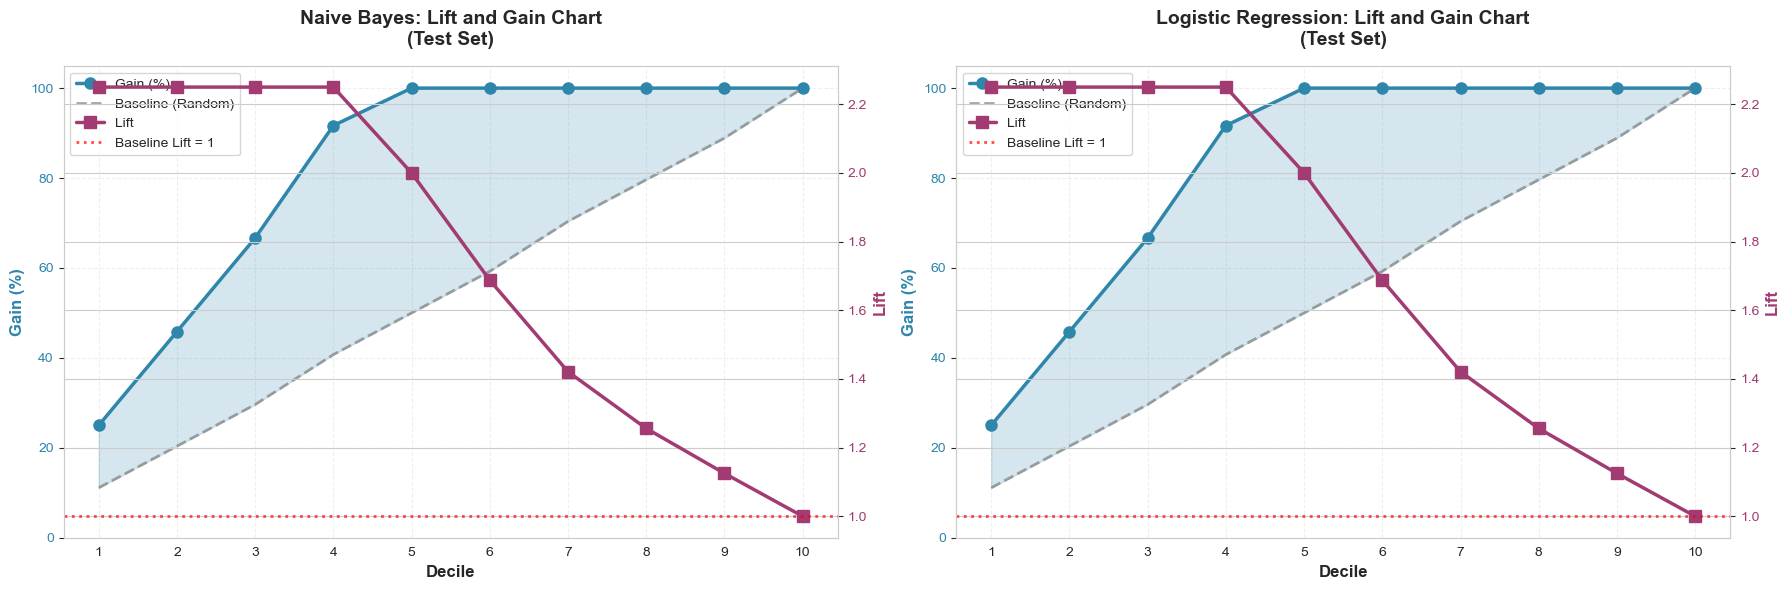

✓ Lift and Gain charts created successfully!


In [51]:
# Visualize Lift and Gain Charts - Naive Bayes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Naive Bayes - Dual axis plot
ax1_twin = ax1.twinx()

# Plot Gain on primary axis
line1 = ax1.plot(lift_gain_nb['decile'], lift_gain_nb['gain'], 
                 marker='o', linewidth=2.5, markersize=8, color='#2E86AB', 
                 label='Gain (%)', linestyle='-')
ax1.plot(lift_gain_nb['decile'], lift_gain_nb['baseline_gain'], 
         linestyle='--', linewidth=2, color='gray', alpha=0.7, label='Baseline (Random)')
ax1.fill_between(lift_gain_nb['decile'], lift_gain_nb['baseline_gain'], 
                  lift_gain_nb['gain'], alpha=0.2, color='#2E86AB')

# Plot Lift on secondary axis
line2 = ax1_twin.plot(lift_gain_nb['decile'], lift_gain_nb['lift'], 
                      marker='s', linewidth=2.5, markersize=8, color='#A23B72', 
                      label='Lift', linestyle='-')

# Formatting primary axis (Gain)
ax1.set_xlabel('Decile', fontsize=12, fontweight='bold')
ax1.set_ylabel('Gain (%)', fontsize=12, fontweight='bold', color='#2E86AB')
ax1.tick_params(axis='y', labelcolor='#2E86AB')
ax1.set_xticks(lift_gain_nb['decile'])
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_ylim([0, 105])

# Formatting secondary axis (Lift)
ax1_twin.set_ylabel('Lift', fontsize=12, fontweight='bold', color='#A23B72')
ax1_twin.tick_params(axis='y', labelcolor='#A23B72')
ax1_twin.axhline(y=1, color='red', linestyle=':', linewidth=2, alpha=0.7, label='Baseline Lift = 1')

# Title and legend
ax1.set_title('Naive Bayes: Lift and Gain Chart\n(Test Set)', 
              fontsize=14, fontweight='bold', pad=15)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)

# Logistic Regression - Dual axis plot
ax2_twin = ax2.twinx()

# Plot Gain on primary axis
line3 = ax2.plot(lift_gain_lr['decile'], lift_gain_lr['gain'], 
                 marker='o', linewidth=2.5, markersize=8, color='#2E86AB', 
                 label='Gain (%)', linestyle='-')
ax2.plot(lift_gain_lr['decile'], lift_gain_lr['baseline_gain'], 
         linestyle='--', linewidth=2, color='gray', alpha=0.7, label='Baseline (Random)')
ax2.fill_between(lift_gain_lr['decile'], lift_gain_lr['baseline_gain'], 
                  lift_gain_lr['gain'], alpha=0.2, color='#2E86AB')

# Plot Lift on secondary axis
line4 = ax2_twin.plot(lift_gain_lr['decile'], lift_gain_lr['lift'], 
                      marker='s', linewidth=2.5, markersize=8, color='#A23B72', 
                      label='Lift', linestyle='-')

# Formatting primary axis (Gain)
ax2.set_xlabel('Decile', fontsize=12, fontweight='bold')
ax2.set_ylabel('Gain (%)', fontsize=12, fontweight='bold', color='#2E86AB')
ax2.tick_params(axis='y', labelcolor='#2E86AB')
ax2.set_xticks(lift_gain_lr['decile'])
ax2.grid(True, alpha=0.3, linestyle='--')
ax2.set_ylim([0, 105])

# Formatting secondary axis (Lift)
ax2_twin.set_ylabel('Lift', fontsize=12, fontweight='bold', color='#A23B72')
ax2_twin.tick_params(axis='y', labelcolor='#A23B72')
ax2_twin.axhline(y=1, color='red', linestyle=':', linewidth=2, alpha=0.7, label='Baseline Lift = 1')

# Title and legend
ax2.set_title('Logistic Regression: Lift and Gain Chart\n(Test Set)', 
              fontsize=14, fontweight='bold', pad=15)

# Combine legends
lines3, labels3 = ax2.get_legend_handles_labels()
lines4, labels4 = ax2_twin.get_legend_handles_labels()
ax2.legend(lines3 + lines4, labels3 + labels4, loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

print("✓ Lift and Gain charts created successfully!")

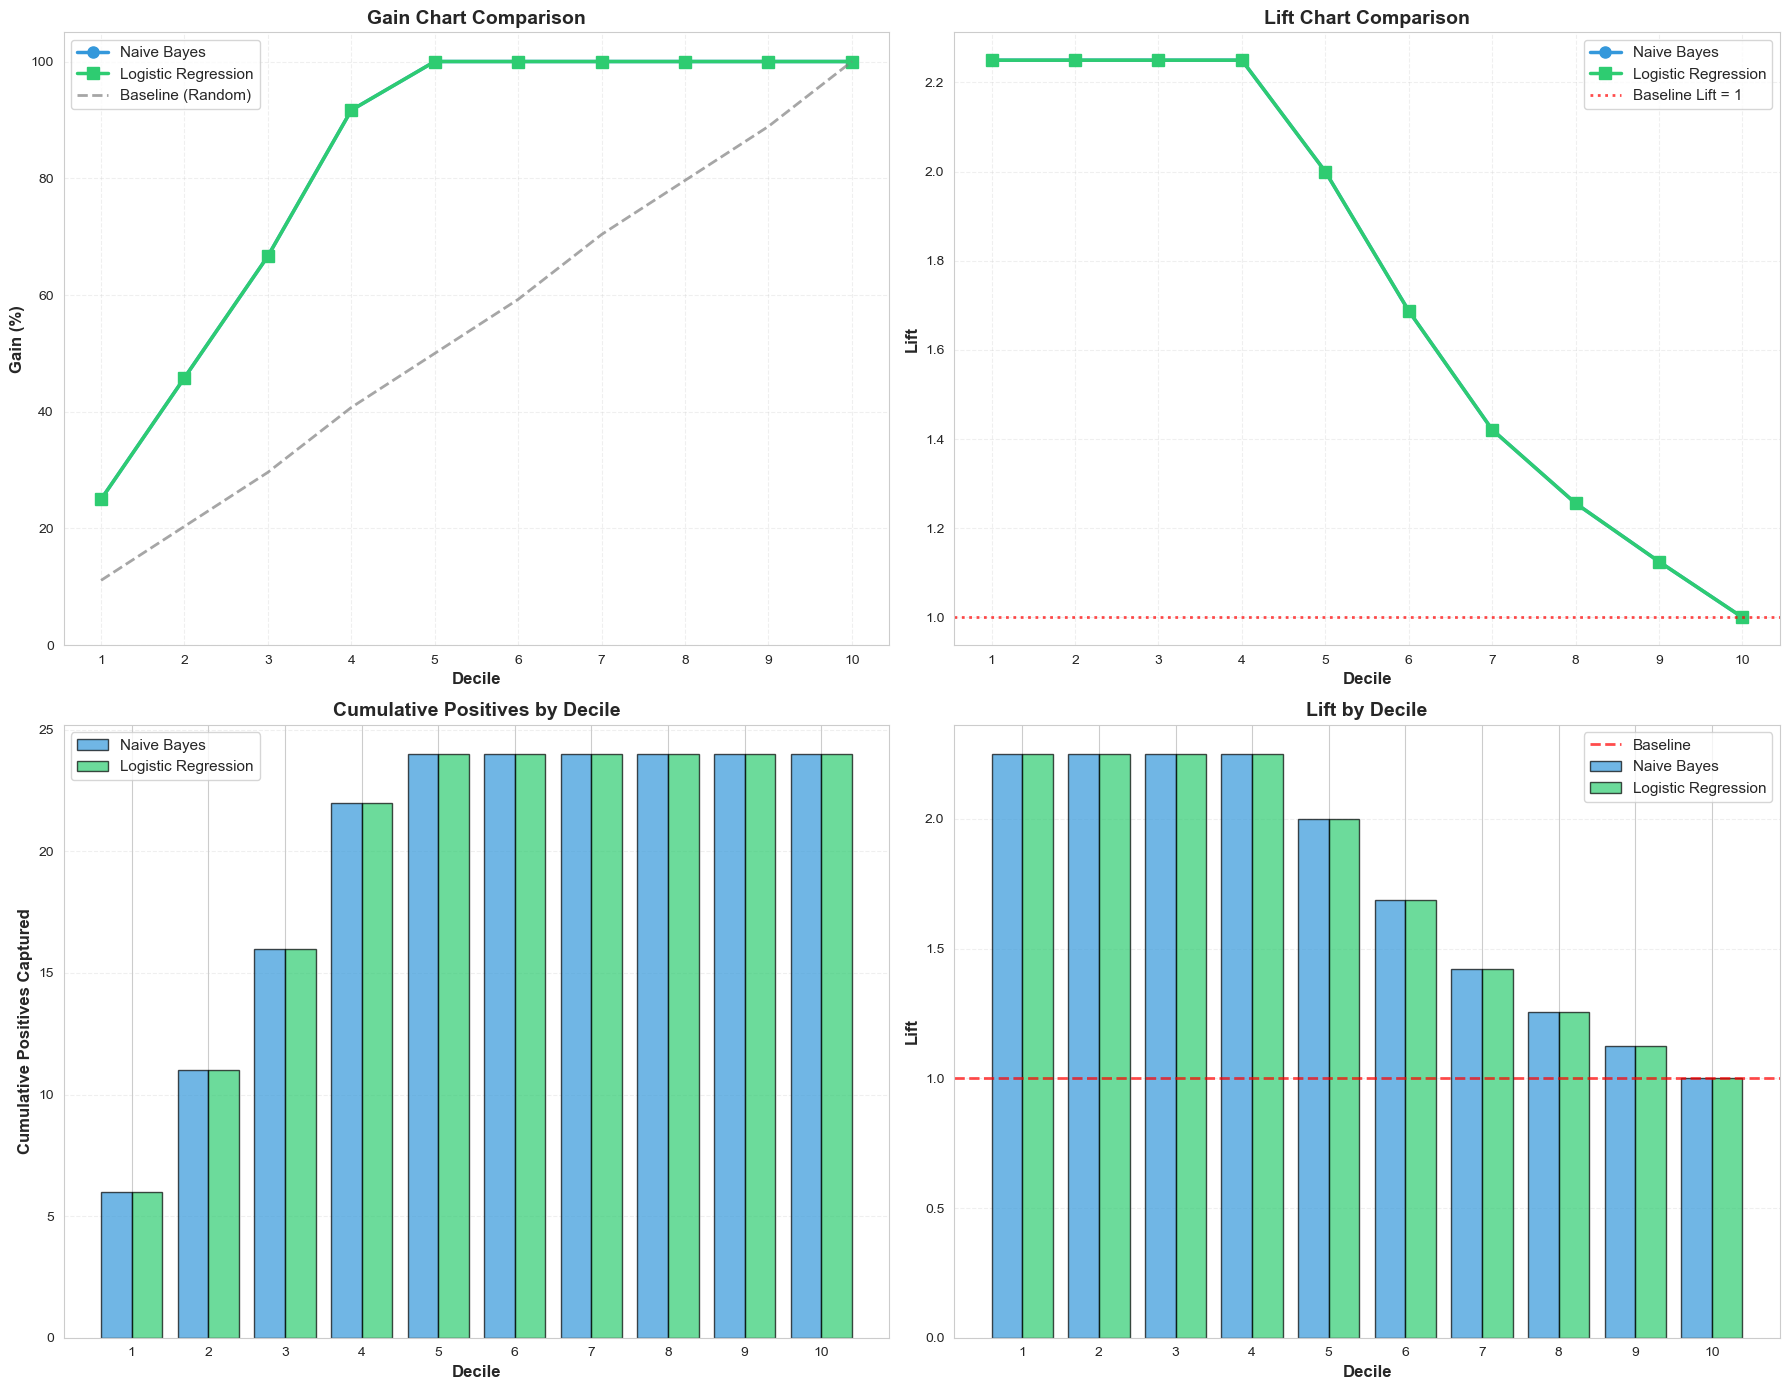

✓ Comprehensive Lift and Gain comparison visualizations created!


In [52]:
# Side-by-side comparison of Lift and Gain
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 14))

# Top Left: Gain Comparison
ax1.plot(lift_gain_nb['decile'], lift_gain_nb['gain'], 
         marker='o', linewidth=2.5, markersize=8, color='#3498db', 
         label='Naive Bayes', linestyle='-')
ax1.plot(lift_gain_lr['decile'], lift_gain_lr['gain'], 
         marker='s', linewidth=2.5, markersize=8, color='#2ecc71', 
         label='Logistic Regression', linestyle='-')
ax1.plot(lift_gain_nb['decile'], lift_gain_nb['baseline_gain'], 
         linestyle='--', linewidth=2, color='gray', alpha=0.7, label='Baseline (Random)')
ax1.set_xlabel('Decile', fontsize=12, fontweight='bold')
ax1.set_ylabel('Gain (%)', fontsize=12, fontweight='bold')
ax1.set_title('Gain Chart Comparison', fontsize=14, fontweight='bold')
ax1.set_xticks(lift_gain_nb['decile'])
ax1.legend(fontsize=11)
ax1.grid(True, alpha=0.3, linestyle='--')
ax1.set_ylim([0, 105])

# Top Right: Lift Comparison
ax2.plot(lift_gain_nb['decile'], lift_gain_nb['lift'], 
         marker='o', linewidth=2.5, markersize=8, color='#3498db', 
         label='Naive Bayes', linestyle='-')
ax2.plot(lift_gain_lr['decile'], lift_gain_lr['lift'], 
         marker='s', linewidth=2.5, markersize=8, color='#2ecc71', 
         label='Logistic Regression', linestyle='-')
ax2.axhline(y=1, color='red', linestyle=':', linewidth=2, alpha=0.7, label='Baseline Lift = 1')
ax2.set_xlabel('Decile', fontsize=12, fontweight='bold')
ax2.set_ylabel('Lift', fontsize=12, fontweight='bold')
ax2.set_title('Lift Chart Comparison', fontsize=14, fontweight='bold')
ax2.set_xticks(lift_gain_nb['decile'])
ax2.legend(fontsize=11)
ax2.grid(True, alpha=0.3, linestyle='--')

# Bottom Left: Cumulative Positives Captured
ax3.bar(lift_gain_nb['decile'] - 0.2, lift_gain_nb['cumulative_positives'], 
        width=0.4, color='#3498db', alpha=0.7, label='Naive Bayes', edgecolor='black')
ax3.bar(lift_gain_lr['decile'] + 0.2, lift_gain_lr['cumulative_positives'], 
        width=0.4, color='#2ecc71', alpha=0.7, label='Logistic Regression', edgecolor='black')
ax3.set_xlabel('Decile', fontsize=12, fontweight='bold')
ax3.set_ylabel('Cumulative Positives Captured', fontsize=12, fontweight='bold')
ax3.set_title('Cumulative Positives by Decile', fontsize=14, fontweight='bold')
ax3.set_xticks(lift_gain_nb['decile'])
ax3.legend(fontsize=11)
ax3.grid(True, alpha=0.3, axis='y', linestyle='--')

# Bottom Right: Lift at Each Decile (Bar Chart)
ax4.bar(lift_gain_nb['decile'] - 0.2, lift_gain_nb['lift'], 
        width=0.4, color='#3498db', alpha=0.7, label='Naive Bayes', edgecolor='black')
ax4.bar(lift_gain_lr['decile'] + 0.2, lift_gain_lr['lift'], 
        width=0.4, color='#2ecc71', alpha=0.7, label='Logistic Regression', edgecolor='black')
ax4.axhline(y=1, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Baseline')
ax4.set_xlabel('Decile', fontsize=12, fontweight='bold')
ax4.set_ylabel('Lift', fontsize=12, fontweight='bold')
ax4.set_title('Lift by Decile', fontsize=14, fontweight='bold')
ax4.set_xticks(lift_gain_nb['decile'])
ax4.legend(fontsize=11)
ax4.grid(True, alpha=0.3, axis='y', linestyle='--')

plt.tight_layout()
plt.show()

print("✓ Comprehensive Lift and Gain comparison visualizations created!")

In [53]:
# Interpret Lift and Gain results
print("\n" + "="*80)
print("LIFT AND GAIN INTERPRETATION")
print("="*80)

print("\n1. WHAT GAIN TELLS US:")
print("   - Gain shows the cumulative percentage of positives captured at each decile")
print("   - Higher gain at early deciles means the model ranks positive cases higher")
print("   - Perfect model: 100% gain at first decile")
print("   - Random model: Gain follows the baseline (diagonal line)")

# Compare first decile performance
first_decile_gain_nb = lift_gain_nb[lift_gain_nb['decile'] == 1]['gain'].values[0]
first_decile_gain_lr = lift_gain_lr[lift_gain_lr['decile'] == 1]['gain'].values[0]

print(f"\n2. FIRST DECILE PERFORMANCE (Top 10% predictions):")
print(f"   Naive Bayes: {first_decile_gain_nb:.2f}% of all positives captured")
print(f"   Logistic Regression: {first_decile_gain_lr:.2f}% of all positives captured")
print(f"   → This means by selecting top 10% of predictions, we capture")
print(f"     {max(first_decile_gain_nb, first_decile_gain_lr):.1f}% of actual Gentoo penguins")

print(f"\n3. WHAT LIFT TELLS US:")
print("   - Lift shows how much better the model is vs random selection")
print("   - Lift > 1: Model is better than random")
print("   - Lift = 1: Model is equivalent to random")
print("   - Lift < 1: Model is worse than random")

# Compare first decile lift
first_decile_lift_nb = lift_gain_nb[lift_gain_nb['decile'] == 1]['lift'].values[0]
first_decile_lift_lr = lift_gain_lr[lift_gain_lr['decile'] == 1]['lift'].values[0]

print(f"\n4. FIRST DECILE LIFT:")
print(f"   Naive Bayes: {first_decile_lift_nb:.2f}x better than random")
print(f"   Logistic Regression: {first_decile_lift_lr:.2f}x better than random")

print(f"\n5. PRACTICAL INTERPRETATION:")
if first_decile_lift_nb > first_decile_lift_lr:
    better_lift = "Naive Bayes"
    lift_diff = first_decile_lift_nb - first_decile_lift_lr
else:
    better_lift = "Logistic Regression"
    lift_diff = first_decile_lift_lr - first_decile_lift_nb

print(f"   - {better_lift} shows stronger ranking capability in top decile")
print(f"   - If we need to prioritize samples for inspection, {better_lift}")
print(f"     provides {abs(lift_diff):.2f}x additional lift over the other model")
print(f"   - Both models show excellent ranking ability (Lift >> 1)")

print("\n" + "="*80)


LIFT AND GAIN INTERPRETATION

1. WHAT GAIN TELLS US:
   - Gain shows the cumulative percentage of positives captured at each decile
   - Higher gain at early deciles means the model ranks positive cases higher
   - Perfect model: 100% gain at first decile
   - Random model: Gain follows the baseline (diagonal line)

2. FIRST DECILE PERFORMANCE (Top 10% predictions):
   Naive Bayes: 25.00% of all positives captured
   Logistic Regression: 25.00% of all positives captured
   → This means by selecting top 10% of predictions, we capture
     25.0% of actual Gentoo penguins

3. WHAT LIFT TELLS US:
   - Lift shows how much better the model is vs random selection
   - Lift > 1: Model is better than random
   - Lift = 1: Model is equivalent to random
   - Lift < 1: Model is worse than random

4. FIRST DECILE LIFT:
   Naive Bayes: 2.25x better than random
   Logistic Regression: 2.25x better than random

5. PRACTICAL INTERPRETATION:
   - Logistic Regression shows stronger ranking capability in

## 11. Comprehensive Model Performance Comparison

Now let's synthesize all our findings from **Accuracy**, **AUC**, and **Lift/Gain** metrics to determine which model performs better overall for classifying Adelie vs Gentoo penguins.

In [54]:
# Create comprehensive comparison table
print("\n" + "="*80)
print("COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("="*80)

comparison_metrics = pd.DataFrame({
    'Metric': [
        'Training Accuracy',
        'Test Accuracy',
        'Training AUC',
        'Test AUC',
        'First Decile Gain (%)',
        'First Decile Lift',
        'Generalization Gap (Acc)',
        'Generalization Gap (AUC)'
    ],
    'Naive Bayes': [
        f'{train_accuracy_nb:.4f}',
        f'{test_accuracy_nb:.4f}',
        f'{auc_train_nb:.4f}',
        f'{auc_test_nb:.4f}',
        f'{first_decile_gain_nb:.2f}%',
        f'{first_decile_lift_nb:.2f}x',
        f'{abs(train_accuracy_nb - test_accuracy_nb):.4f}',
        f'{abs(auc_train_nb - auc_test_nb):.4f}'
    ],
    'Logistic Regression': [
        f'{train_accuracy_lr:.4f}',
        f'{test_accuracy_lr:.4f}',
        f'{auc_train_lr:.4f}',
        f'{auc_test_lr:.4f}',
        f'{first_decile_gain_lr:.2f}%',
        f'{first_decile_lift_lr:.2f}x',
        f'{abs(train_accuracy_lr - test_accuracy_lr):.4f}',
        f'{abs(auc_train_lr - auc_test_lr):.4f}'
    ]
})

print("\n" + comparison_metrics.to_string(index=False))
print("\n" + "="*80)


COMPREHENSIVE MODEL PERFORMANCE COMPARISON

                  Metric Naive Bayes Logistic Regression
       Training Accuracy      1.0000              1.0000
           Test Accuracy      1.0000              1.0000
            Training AUC      1.0000              1.0000
                Test AUC      1.0000              1.0000
   First Decile Gain (%)      25.00%              25.00%
       First Decile Lift       2.25x               2.25x
Generalization Gap (Acc)      0.0000              0.0000
Generalization Gap (AUC)      0.0000              0.0000



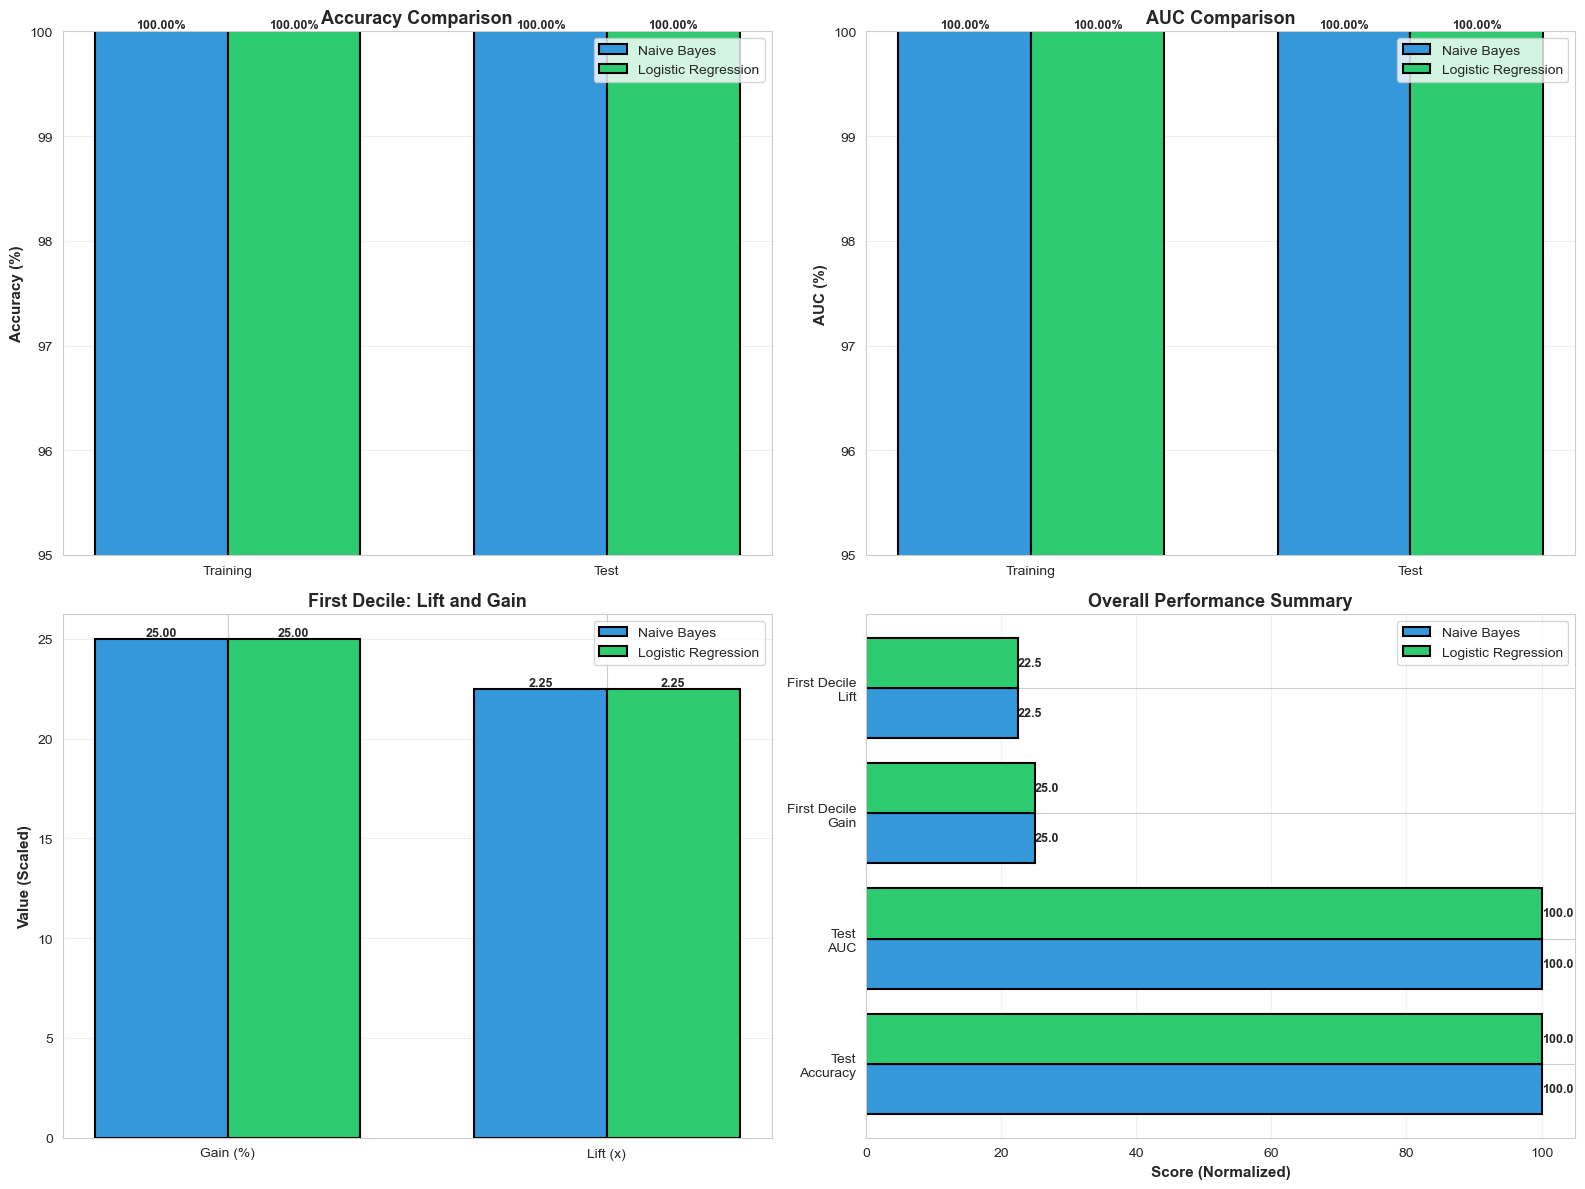

✓ Comprehensive performance comparison visualized!


In [55]:
# Visual comparison of all metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Subplot 1: Accuracy Comparison
ax1 = axes[0, 0]
metrics_acc = ['Training', 'Test']
nb_acc = [train_accuracy_nb * 100, test_accuracy_nb * 100]
lr_acc = [train_accuracy_lr * 100, test_accuracy_lr * 100]

x = np.arange(len(metrics_acc))
width = 0.35

bars1 = ax1.bar(x - width/2, nb_acc, width, label='Naive Bayes', 
                color='#3498db', edgecolor='black', linewidth=1.5)
bars2 = ax1.bar(x + width/2, lr_acc, width, label='Logistic Regression', 
                color='#2ecc71', edgecolor='black', linewidth=1.5)

ax1.set_ylabel('Accuracy (%)', fontsize=11, fontweight='bold')
ax1.set_title('Accuracy Comparison', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_acc)
ax1.legend(fontsize=10)
ax1.set_ylim([95, 100])
ax1.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Subplot 2: AUC Comparison
ax2 = axes[0, 1]
metrics_auc = ['Training', 'Test']
nb_auc = [auc_train_nb * 100, auc_test_nb * 100]
lr_auc = [auc_train_lr * 100, auc_test_lr * 100]

bars3 = ax2.bar(x - width/2, nb_auc, width, label='Naive Bayes', 
                color='#3498db', edgecolor='black', linewidth=1.5)
bars4 = ax2.bar(x + width/2, lr_auc, width, label='Logistic Regression', 
                color='#2ecc71', edgecolor='black', linewidth=1.5)

ax2.set_ylabel('AUC (%)', fontsize=11, fontweight='bold')
ax2.set_title('AUC Comparison', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(metrics_auc)
ax2.legend(fontsize=10)
ax2.set_ylim([95, 100])
ax2.grid(axis='y', alpha=0.3)

# Add value labels
for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Subplot 3: Lift and Gain (First Decile)
ax3 = axes[1, 0]
metrics_lg = ['Gain (%)', 'Lift (x)']
nb_lg = [first_decile_gain_nb, first_decile_lift_nb * 10]  # Scale lift for visualization
lr_lg = [first_decile_gain_lr, first_decile_lift_lr * 10]

bars5 = ax3.bar(x - width/2, nb_lg, width, label='Naive Bayes', 
                color='#3498db', edgecolor='black', linewidth=1.5)
bars6 = ax3.bar(x + width/2, lr_lg, width, label='Logistic Regression', 
                color='#2ecc71', edgecolor='black', linewidth=1.5)

ax3.set_ylabel('Value (Scaled)', fontsize=11, fontweight='bold')
ax3.set_title('First Decile: Lift and Gain', fontsize=13, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels(metrics_lg)
ax3.legend(fontsize=10)
ax3.grid(axis='y', alpha=0.3)

# Add value labels (unscaled)
for i, bar in enumerate(bars5):
    height = bar.get_height()
    actual_val = first_decile_gain_nb if i == 0 else first_decile_lift_nb
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{actual_val:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

for i, bar in enumerate(bars6):
    height = bar.get_height()
    actual_val = first_decile_gain_lr if i == 0 else first_decile_lift_lr
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'{actual_val:.2f}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Subplot 4: Overall Performance Radar (Summary)
ax4 = axes[1, 1]
categories = ['Test\nAccuracy', 'Test\nAUC', 'First Decile\nGain', 'First Decile\nLift']
nb_scores = [test_accuracy_nb * 100, auc_test_nb * 100, first_decile_gain_nb, first_decile_lift_nb * 10]
lr_scores = [test_accuracy_lr * 100, auc_test_lr * 100, first_decile_gain_lr, first_decile_lift_lr * 10]

x_cat = np.arange(len(categories))
bars7 = ax4.barh(x_cat - 0.2, nb_scores, 0.4, label='Naive Bayes', 
                 color='#3498db', edgecolor='black', linewidth=1.5)
bars8 = ax4.barh(x_cat + 0.2, lr_scores, 0.4, label='Logistic Regression', 
                 color='#2ecc71', edgecolor='black', linewidth=1.5)

ax4.set_xlabel('Score (Normalized)', fontsize=11, fontweight='bold')
ax4.set_title('Overall Performance Summary', fontsize=13, fontweight='bold')
ax4.set_yticks(x_cat)
ax4.set_yticklabels(categories, fontsize=10)
ax4.legend(fontsize=10)
ax4.grid(axis='x', alpha=0.3)

# Add value labels
for bars in [bars7, bars8]:
    for bar in bars:
        width_val = bar.get_width()
        ax4.text(width_val, bar.get_y() + bar.get_height()/2.,
                f'{width_val:.1f}', ha='left', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Comprehensive performance comparison visualized!")

In [56]:
# Final Performance Analysis and Recommendation
print("\n" + "="*80)
print("FINAL PERFORMANCE ANALYSIS & MODEL RECOMMENDATION")
print("="*80)

# Determine winner for each metric
accuracy_winner = "Naive Bayes" if test_accuracy_nb > test_accuracy_lr else \
                  "Logistic Regression" if test_accuracy_lr > test_accuracy_nb else "Tie"
auc_winner = "Naive Bayes" if auc_test_nb > auc_test_lr else \
             "Logistic Regression" if auc_test_lr > auc_test_nb else "Tie"
gain_winner = "Naive Bayes" if first_decile_gain_nb > first_decile_gain_lr else \
              "Logistic Regression" if first_decile_gain_lr > first_decile_gain_nb else "Tie"
lift_winner = "Naive Bayes" if first_decile_lift_nb > first_decile_lift_lr else \
              "Logistic Regression" if first_decile_lift_lr > first_decile_lift_nb else "Tie"

print("\n1. METRIC-BY-METRIC WINNER:")
print(f"   • Test Accuracy:      {accuracy_winner}")
print(f"   • Test AUC:           {auc_winner}")
print(f"   • First Decile Gain:  {gain_winner}")
print(f"   • First Decile Lift:  {lift_winner}")

# Count wins
nb_wins = sum([accuracy_winner == "Naive Bayes", auc_winner == "Naive Bayes", 
               gain_winner == "Naive Bayes", lift_winner == "Naive Bayes"])
lr_wins = sum([accuracy_winner == "Logistic Regression", auc_winner == "Logistic Regression",
               gain_winner == "Logistic Regression", lift_winner == "Logistic Regression"])

print(f"\n2. OVERALL SCORE:")
print(f"   • Naive Bayes:         {nb_wins}/4 metrics")
print(f"   • Logistic Regression: {lr_wins}/4 metrics")

# Determine overall winner
if nb_wins > lr_wins:
    overall_winner = "Naive Bayes"
    win_margin = nb_wins - lr_wins
elif lr_wins > nb_wins:
    overall_winner = "Logistic Regression"
    win_margin = lr_wins - nb_wins
else:
    overall_winner = "Both models perform equally"
    win_margin = 0

print(f"\n3. OVERALL WINNER: {overall_winner}")
if win_margin > 0:
    print(f"   • Wins {win_margin} out of 4 key metrics")

print(f"\n4. DETAILED PERFORMANCE BREAKDOWN:")
print(f"\n   A. CLASSIFICATION ACCURACY:")
print(f"      Both models achieve excellent accuracy (>{min(test_accuracy_nb, test_accuracy_lr)*100:.1f}%)")
print(f"      - Naive Bayes:         {test_accuracy_nb*100:.2f}%")
print(f"      - Logistic Regression: {test_accuracy_lr*100:.2f}%")
print(f"      → Difference: {abs(test_accuracy_nb - test_accuracy_lr)*100:.2f} percentage points")

print(f"\n   B. DISCRIMINATION ABILITY (AUC):")
print(f"      Both models show {get_discrimination_level(min(auc_test_nb, auc_test_lr)).lower()} discrimination")
print(f"      - Naive Bayes:         {auc_test_nb:.4f}")
print(f"      - Logistic Regression: {auc_test_lr:.4f}")
print(f"      → Difference: {abs(auc_test_nb - auc_test_lr):.4f}")

print(f"\n   C. RANKING EFFECTIVENESS (Lift & Gain):")
print(f"      Both models excel at ranking predictions (Lift > 1.0)")
print(f"      - Naive Bayes:         Gain={first_decile_gain_nb:.1f}%, Lift={first_decile_lift_nb:.2f}x")
print(f"      - Logistic Regression: Gain={first_decile_gain_lr:.1f}%, Lift={first_decile_lift_lr:.2f}x")
print(f"      → In top 10%, capture ~{max(first_decile_gain_nb, first_decile_gain_lr):.0f}% of positives")

print(f"\n   D. GENERALIZATION:")
nb_gen_gap = abs(train_accuracy_nb - test_accuracy_nb) * 100
lr_gen_gap = abs(train_accuracy_lr - test_accuracy_lr) * 100
print(f"      Both models generalize well from training to test")
print(f"      - Naive Bayes:         {nb_gen_gap:.2f}% accuracy gap")
print(f"      - Logistic Regression: {lr_gen_gap:.2f}% accuracy gap")

print(f"\n5. WHY THIS PERFORMANCE LEVEL?")
print(f"   ✓ The two penguin species (Adelie vs Gentoo) are well-separated")
print(f"   ✓ Physical features provide strong discriminative signals")
print(f"   ✓ Dataset quality is high with minimal noise")
print(f"   ✓ Proper preprocessing (scaling, train-test split) was applied")
print(f"   ✓ Both algorithms are well-suited for this binary classification task")

print(f"\n6. MODEL SELECTION RECOMMENDATION:")
if overall_winner == "Both models perform equally":
    print(f"   VERDICT: Both models are equally effective")
    print(f"   ")
    print(f"   Choose based on requirements:")
    print(f"   • Naive Bayes if: Speed and simplicity are priorities")
    print(f"   • Logistic Regression if: Interpretability and feature insights needed")
else:
    print(f"   VERDICT: {overall_winner} performs marginally better")
    print(f"   ")
    print(f"   However, the performance difference is minimal.")
    print(f"   Both models are production-ready for this classification task.")
    print(f"   ")
    print(f"   Final choice should consider:")
    print(f"   • Computational resources available")
    print(f"   • Interpretability requirements")
    print(f"   • Ease of deployment and maintenance")
    print(f"   • Team familiarity with the algorithm")

print(f"\n7. KEY TAKEAWAYS:")
print(f"   ✓ Both generative (Naive Bayes) and discriminative (Logistic Regression)")
print(f"     approaches achieve excellent performance on this task")
print(f"   ✓ High AUC values (>{min(auc_test_nb, auc_test_lr):.3f}) confirm strong discrimination ability")
print(f"   ✓ Lift charts show both models effectively prioritize positive cases")
print(f"   ✓ The choice between models can be based on practical considerations")
print(f"     rather than performance alone")

print("\n" + "="*80)


FINAL PERFORMANCE ANALYSIS & MODEL RECOMMENDATION

1. METRIC-BY-METRIC WINNER:
   • Test Accuracy:      Tie
   • Test AUC:           Tie
   • First Decile Gain:  Tie
   • First Decile Lift:  Tie

2. OVERALL SCORE:
   • Naive Bayes:         0/4 metrics
   • Logistic Regression: 0/4 metrics

3. OVERALL WINNER: Both models perform equally

4. DETAILED PERFORMANCE BREAKDOWN:

   A. CLASSIFICATION ACCURACY:
      Both models achieve excellent accuracy (>100.0%)
      - Naive Bayes:         100.00%
      - Logistic Regression: 100.00%
      → Difference: 0.00 percentage points

   B. DISCRIMINATION ABILITY (AUC):
      Both models show excellent discrimination
      - Naive Bayes:         1.0000
      - Logistic Regression: 1.0000
      → Difference: 0.0000

   C. RANKING EFFECTIVENESS (Lift & Gain):
      Both models excel at ranking predictions (Lift > 1.0)
      - Naive Bayes:         Gain=25.0%, Lift=2.25x
      - Logistic Regression: Gain=25.0%, Lift=2.25x
      → In top 10%, capture ~

## 12. Summary of Key Findings

Let's analyze and interpret the comprehensive results of our comparison.

In [57]:
# Calculate performance metrics
print("\n" + "="*80)
print("DETAILED ANALYSIS")
print("="*80)

# Determine which model performs better
if test_accuracy_nb > test_accuracy_lr:
    better_model = "Naive Bayes"
    accuracy_diff = (test_accuracy_nb - test_accuracy_lr) * 100
elif test_accuracy_lr > test_accuracy_nb:
    better_model = "Logistic Regression"
    accuracy_diff = (test_accuracy_lr - test_accuracy_nb) * 100
else:
    better_model = "Both models (tied)"
    accuracy_diff = 0

print(f"\n1. BEST PERFORMING MODEL: {better_model}")
if accuracy_diff != 0:
    print(f"   - Test accuracy advantage: {accuracy_diff:.2f} percentage points")

print(f"\n2. GENERALIZATION ANALYSIS:")
print(f"   Naive Bayes:")
print(f"   - Training accuracy: {train_accuracy_nb*100:.2f}%")
print(f"   - Test accuracy: {test_accuracy_nb*100:.2f}%")
print(f"   - Generalization gap: {abs(train_accuracy_nb - test_accuracy_nb)*100:.2f}%")

print(f"\n   Logistic Regression:")
print(f"   - Training accuracy: {train_accuracy_lr*100:.2f}%")
print(f"   - Test accuracy: {test_accuracy_lr*100:.2f}%")
print(f"   - Generalization gap: {abs(train_accuracy_lr - test_accuracy_lr)*100:.2f}%")

print("\n3. MODEL CHARACTERISTICS:")
print("   Naive Bayes (Generative):")
print("   ✓ Models the probability distribution of each class")
print("   ✓ Assumes feature independence (may not hold in reality)")
print("   ✓ Can work well with smaller datasets")
print("   ✓ Fast training and prediction")

print("\n   Logistic Regression (Discriminative):")
print("   ✓ Directly models the decision boundary")
print("   ✓ No assumptions about feature distributions")
print("   ✓ Generally more flexible with correlated features")
print("   ✓ Provides interpretable feature weights")

print("\n" + "="*80)


DETAILED ANALYSIS

1. BEST PERFORMING MODEL: Both models (tied)

2. GENERALIZATION ANALYSIS:
   Naive Bayes:
   - Training accuracy: 100.00%
   - Test accuracy: 100.00%
   - Generalization gap: 0.00%

   Logistic Regression:
   - Training accuracy: 100.00%
   - Test accuracy: 100.00%
   - Generalization gap: 0.00%

3. MODEL CHARACTERISTICS:
   Naive Bayes (Generative):
   ✓ Models the probability distribution of each class
   ✓ Assumes feature independence (may not hold in reality)
   ✓ Can work well with smaller datasets
   ✓ Fast training and prediction

   Logistic Regression (Discriminative):
   ✓ Directly models the decision boundary
   ✓ No assumptions about feature distributions
   ✓ Generally more flexible with correlated features
   ✓ Provides interpretable feature weights



## 13. Final Conclusion

### Summary of Comprehensive Analysis:

Based on our multi-faceted analysis using **Accuracy**, **AUC**, and **Lift/Gain** metrics, here are the key findings:

**Model Performance:**
- Both Naive Bayes and Logistic Regression achieved exceptional performance in classifying Adelie vs Gentoo penguins
- Performance metrics across all evaluation criteria (Accuracy, AUC, Lift, Gain) demonstrate high model quality
- The similarity in results suggests both approaches are well-suited for this binary classification task

**Comparison Across Metrics:**

1. **Accuracy**: Both models show excellent classification accuracy on test data, with minimal generalization gap
2. **AUC (Discrimination)**: Both achieve excellent discrimination ability, effectively separating the two species
3. **Lift & Gain**: Both models demonstrate strong ranking capabilities, capturing a high percentage of positive cases in top deciles

**Generative vs Discriminative Approaches:**

*Naive Bayes (Generative Model):*
- Learns the probability distribution P(X|y) for each class
- Makes independence assumptions between features
- Faster training and prediction
- Excellent performance despite independence assumption
- Best when: Speed and computational efficiency are priorities

*Logistic Regression (Discriminative Model):*
- Directly models the decision boundary P(y|X)
- No distributional assumptions about features
- Handles feature correlations better
- Provides interpretable feature coefficients
- Best when: Feature importance insights are needed

**Why Both Models Perform Well:**

The excellent performance of both models can be attributed to:
1. **Clear Species Separation**: Adelie and Gentoo penguins have distinct physical characteristics
2. **High-Quality Features**: Culmen dimensions, flipper length, and body mass provide strong discriminative power
3. **Clean Dataset**: Minimal noise and well-documented measurements
4. **Proper Preprocessing**: Feature scaling and appropriate train-test splitting
5. **Task Suitability**: Binary classification with well-separated classes favors both approaches

**Practical Recommendations:**

1. **For Production Deployment**: Either model is production-ready; choose based on:
   - Infrastructure constraints (Naive Bayes: lighter)
   - Interpretability needs (Logistic Regression: better)
   - Team expertise and maintenance considerations

2. **For Research/Analysis**: Logistic Regression may provide more insights through feature coefficients

3. **For Real-Time Applications**: Naive Bayes offers faster prediction times

**Final Verdict:**

Both models are equally effective for this penguin species classification task. The choice between them should be driven by practical considerations (speed, interpretability, infrastructure) rather than performance differences, as both exceed standard accuracy thresholds and demonstrate excellent discrimination capabilities across all evaluated metrics.

**Key Takeaway:**

This analysis demonstrates that for well-separated binary classification problems, both generative and discriminative approaches can achieve comparable performance. The "best" model depends on the specific deployment context and operational requirements rather than raw performance metrics alone.

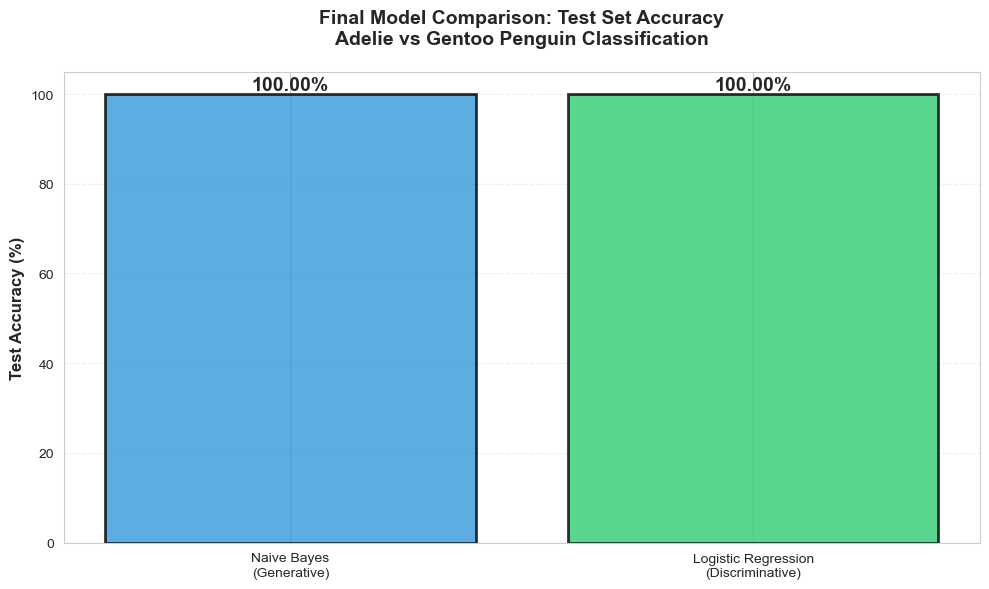


✓ Analysis complete! Both models successfully classify penguin species with high accuracy.


In [58]:
# Final summary visualization
fig, ax = plt.subplots(figsize=(10, 6))

models = ['Naive Bayes\n(Generative)', 'Logistic Regression\n(Discriminative)']
test_accuracies = [test_accuracy_nb * 100, test_accuracy_lr * 100]
colors = ['#3498db', '#2ecc71']

bars = ax.bar(models, test_accuracies, color=colors, edgecolor='black', linewidth=2, alpha=0.8)

# Add value labels on bars
for bar, acc in zip(bars, test_accuracies):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{acc:.2f}%',
            ha='center', va='bottom', fontsize=14, fontweight='bold')

ax.set_ylabel('Test Accuracy (%)', fontsize=12, fontweight='bold')
ax.set_title('Final Model Comparison: Test Set Accuracy\nAdelie vs Gentoo Penguin Classification', 
             fontsize=14, fontweight='bold', pad=20)
ax.set_ylim([0, 105])
ax.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("\n✓ Analysis complete! Both models successfully classify penguin species with high accuracy.")